##🧪 Purpose of Model 2

Goal: Predict the author of a given quote using a classifier trained on real samples.

>Why? If your generated outputs confuse this model (i.e., it can’t tell them apart from your actual quotes), that means your generation matches your style well.

---

####Step 1: Load Data & Check for Issues

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

#file path
file_path = "/content/drive/MyDrive/6165 AI ML Project/Manasa_data/FinalData/cleaned_authorship_dataset.csv"

In [ ]:
# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,id,cleaned_text
0,10.0,Tim/Bob:\nAttached is the letter that we sent ...
1,10.0,"May-June, 2000\n---------------------- AM ----..."
2,10.0,"mona.petrochko@enron.com, susan.mara@enron.com..."
3,10.0,"james.steffes@enron.com, richard.shapiro@enron..."
4,10.0,"sarah.novosel@enron.com, susan.mara@enron.com,..."


In [ ]:
import pandas as pd

#file path
file_path_2 = "/content/drive/MyDrive/6165 AI ML Project/Manasa_data/merged_df.csv"

# Load the dataset
merged_df = pd.read_csv(file_path_2)

# Display first few rows
merged_df.head()

,filename,Document Type,cleaned_text,Prompt,Tone,Style
0,014995D6-046A-4D7A-8574-AD08DFC1304A.PNG,quote,There's a mad imbalance between technical and ...,Write a quote in your personal style.,Hopeful,Poetic
1,016EB16E-EC76-4EA9-8781-4CA8F6A040CB.JPG,quote,Some things happen to make space for other thi...,Write a quote in your personal style.,Reflective,Poetic
2,016EB16E-EC76-4EA9-8781-4CA8F6A040CB.JPG,quote,Some things happen to make space for other thi...,Write a quote in your personal style.,Reflective,Poetic
3,016EB16E-EC76-4EA9-8781-4CA8F6A040CB.JPG,quote,Some things happen to make space for other thi...,Write a quote in your personal style.,Reflective,Poetic
4,01ef438f-cffc-41d7-bd78-399cc96b3b12.JPG,quote,We are the precious souvenirs at weddings!,Write a quote in your personal style.,Thoughtful,Conversational


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52134 entries, 0 to 52133
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            52134 non-null  float64
 1   cleaned_text  52134 non-null  object 
dtypes: float64(1), object(1)
memory usage: 814.7+ KB


In [ ]:

# Check missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Drop rows where cleaned_text is missing
df = df.dropna(subset=["cleaned_text"])

# Check again after dropping missing cleaned_text
print("Missing values after removing empty text rows:\n", df.isnull().sum())

# Fill missing IDs with a placeholder (if necessary)
#df["id"] = df["id"].fillna(-1)  # Use -1 to indicate unknown author

# Save cleaned dataset
df.to_csv("cleaned_authorship_dataset.csv", index=False)

print("Final dataset shape:", df.shape)
df.head()


Missing values before cleaning:
 id              0
cleaned_text    0
dtype: int64
Missing values after removing empty text rows:
 id              0
cleaned_text    0
dtype: int64
Final dataset shape: (52134, 2)


,id,cleaned_text
0,10.0,Tim/Bob:\nAttached is the letter that we sent ...
1,10.0,"May-June, 2000\n---------------------- AM ----..."
2,10.0,"mona.petrochko@enron.com, susan.mara@enron.com..."
3,10.0,"james.steffes@enron.com, richard.shapiro@enron..."
4,10.0,"sarah.novosel@enron.com, susan.mara@enron.com,..."


Total Unique Authors: 7

Top 10 Authors by Sample Count:
 id
11.0        16716
12.0        14206
10.0        11356
449628.0     4217
734562.0     2293
589736.0     2288
123456.0     1058
Name: count, dtype: int64


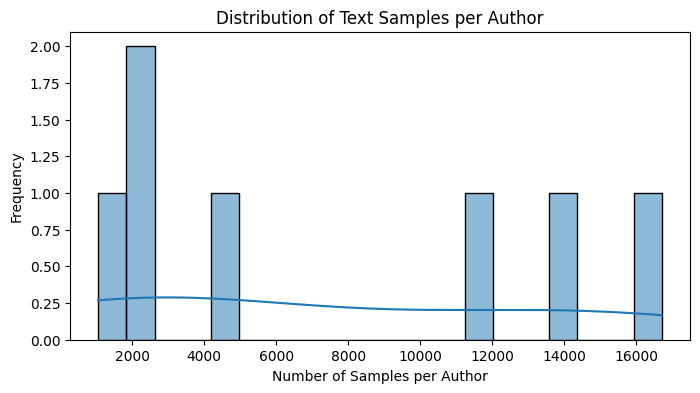

In [ ]:
# Number of unique authors
print(f"Total Unique Authors: {df['id'].nunique()}")

# Distribution of samples per author
author_counts = df['id'].value_counts()

# Show top 10 authors with most data
print("\nTop 10 Authors by Sample Count:\n", author_counts.head(10))

# Visualize author distribution
plt.figure(figsize=(8,4))
sns.histplot(author_counts, bins=20, kde=True)
plt.xlabel("Number of Samples per Author")
plt.ylabel("Frequency")
plt.title("Distribution of Text Samples per Author")
plt.show()

## 📊 Dataset Overview and Distribution Analysis

The dataset comprises **51,234 cleaned text samples** from **7 distinct authors**, used for authorship classification. Each record includes:

- **`id`**: Unique identifier for the author  
- **`cleaned_text`**: Preprocessed text attributed to that author

---

## 🔍 Key Observations from Initial Data Exploration

### 🧑‍💻 Author Distribution
- The dataset is **highly imbalanced** across authors.
- The most represented author (`id = 11.0`) contributes **16,716 samples**.
- The least represented author (`id = 123456.0`, corresponding to **Model 1's training author**) has only **1,058 samples**.
- Other authors have between **2,288 and 14,206 samples**, highlighting a skewed dataset.

### 📉 Distribution of Text Samples per Author
- The histogram shows a **right-skewed distribution**.
- A **few authors dominate** the dataset, contributing the bulk of the samples.
- This imbalance can introduce **bias** and cause the model to **overfit to dominant authors**.

---

## ⚠️ Implications for Model 2 Development

To improve generalization and reduce author bias:

- ✅ **Downsampling** the majority classes may help balance representation.
- ✅ **Data augmentation** (e.g., using synthetic generation) could enhance minority author representation.
- ✅ **Stratified sampling** is essential for fair training/validation splits.

###Top Authors by Sample Count:



1.   Author 11.0 has the most samples (16,716), followed by 12.0 (14,206), and 10.0 (11,356).
2.   Other authors have significantly fewer samples (e.g., 123456.0 has only 1,058). This imbalance could affect training




In [ ]:
# Convert all 'id' values to string type
df["id"] = df["id"].astype(str)

# Verify the change
print(df.dtypes)  # id should now be 'object' (string)
df.head(5)

id              object
cleaned_text    object
dtype: object


,id,cleaned_text
0,10.0,Tim/Bob:\nAttached is the letter that we sent ...
1,10.0,"May-June, 2000\n---------------------- AM ----..."
2,10.0,"mona.petrochko@enron.com, susan.mara@enron.com..."
3,10.0,"james.steffes@enron.com, richard.shapiro@enron..."
4,10.0,"sarah.novosel@enron.com, susan.mara@enron.com,..."


In [ ]:
#drop the records of author 123456
df = df[df["id"] != "123456.0"]

In [ ]:
#check if successfully dropped
df['id'].value_counts()

,count
id,
11.0,16716
12.0,14206
10.0,11356
449628.0,4217
734562.0,2293
589736.0,2288


In [ ]:
import pandas as pd

# STEP 1: Add word and character counts
df["word_count"] = df["cleaned_text"].apply(lambda x: len(str(x).split()))
df["char_count"] = df["cleaned_text"].apply(lambda x: len(str(x)))

# STEP 2: Filter for short-form content (quote-like)
df_short = df[(df["word_count"] <= 30) & (df["char_count"] <= 400)]

# STEP 3: Cap each author to 400 entries max
df_balanced = df_short.groupby("id", group_keys=False).apply(lambda x: x.sample(min(len(x), 350), random_state=42))

# STEP 4: Reset index for cleanliness
df_balanced = df_balanced.reset_index(drop=True)

# Preview
df_balanced['id'].value_counts()
df_balanced.head()


<ipython-input-13-bd1ffd3e3bf4>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_short.groupby("id", group_keys=False).apply(lambda x: x.sample(min(len(x), 350), random_state=42))


,id,cleaned_text,word_count,char_count
0,10.0,I just got this note morning. Something must ...,22,122
1,10.0,"If Ken Lay's going to be in Sac, seems that he...",19,95
2,10.0,Very nice touch; particularly the opening para...,18,118
3,10.0,on interminable conference calls. i'll call l...,9,60
4,10.0,"oh man, that's bad. we'll you're on the list ...",10,50


In [ ]:
#check unique entries per author
df_balanced['id'].value_counts()

,count
id,
10.0,350
11.0,350
12.0,350
449628.0,350
589736.0,350
734562.0,350


## 🧑‍🎨 Integrating User Quotes into the Authorship Dataset

1. **Load Personal Style Data**  
   - Load `merged_df.csv`, which contains your own personal quotes.
   - Extract the `cleaned_text` column, ensuring only non-null, unique entries are included.

2. **Label and Format User Data**
   - Wrap the quotes in a new DataFrame.
   - Assign an author label `"user"` to all entries.
   - Calculate:
     - `word_count` – number of words in each quote
     - `char_count` – number of characters

3. **Apply Short-Form Filter**
   - Keep only quotes with:
     - ≤ 30 words
     - ≤ 200 characters  
   This ensures consistency with the format of short-form texts in the original dataset.

4. **Concatenate with Balanced Dataset**
   - Combine your personal quotes (`df_user_quotes`) with the already balanced dataset (`df_balanced`) using `pd.concat`.

5. **Verify Class Distribution**
   - Print value counts of the `id` column to confirm that the `"user"` class has been successfully added.

### 📌 Why This Matters

Adding your quotes allows the model to:
- Learn and compare your writing style
- Be evaluated fairly against existing authors in downstream tasks like classification or generation


In [ ]:
# Load your personal quotes from merged_df.csv
user_quotes_df = pd.read_csv("/content/drive/MyDrive/6165 AI ML Project/Manasa_data/merged_df.csv")

# Extract cleaned quotes
user_cleaned_quotes = user_quotes_df["cleaned_text"].dropna().unique()

# Wrap them in a new DataFrame and label them as 'user'
df_user_quotes = pd.DataFrame({
    "cleaned_text": user_cleaned_quotes,
    "id": ["user"] * len(user_cleaned_quotes)
})

# Optional: Apply same short-form filtering for consistency
df_user_quotes["word_count"] = df_user_quotes["cleaned_text"].apply(lambda x: len(str(x).split()))
df_user_quotes["char_count"] = df_user_quotes["cleaned_text"].apply(lambda x: len(str(x)))

df_user_quotes = df_user_quotes[(df_user_quotes["word_count"] <= 30) & (df_user_quotes["char_count"] <= 200)]

# Finalize format to match df_balanced
df_user_quotes = df_user_quotes[["id", "cleaned_text"]]

# Concatenate with the balanced dataset
df_final = pd.concat([df_balanced, df_user_quotes], ignore_index=True)

# Check updated class distribution
df_final["id"].value_counts()

,count
id,
user,351
11.0,350
10.0,350
12.0,350
449628.0,350
589736.0,350
734562.0,350


## ✏️ Text Length Analysis

### 🔢 Basic Statistics
To better understand the structure of the dataset, we computed basic text length features:

- **Average Word Count:** 14.69 words per sample
- **Average Character Count:** 87.62 characters per sample

These values suggest the dataset primarily consists of short-form content, such as quotes or reflective statements — ideal for stylistic analysis.

---

### 📊 Word Count Distribution

The histogram below visualizes the distribution of word counts across all text samples:

- Most samples contain **5 to 25 words**, with a peak around **10–12 words**.
- The KDE (blue line) provides a smooth curve showing overall distribution shape.
- The sharp drop near 30 words reflects the filtering criteria applied earlier (i.e., samples were capped at 30 words).

---

### ✅ Why This Matters

- Helps validate that the dataset aligns with the intended short-form format.
- Informs tokenizer and model input length settings (e.g., `max_length=128` is more than sufficient).
- Confirms consistency between user-provided samples and the existing author corpus.

Average Word Count: 14.69
Average Character Count: 87.62


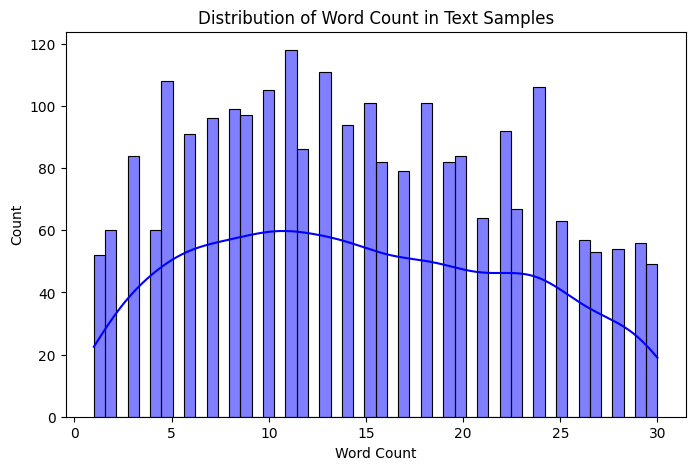

In [ ]:
# Add text length features
df_final["word_count"] = df_final["cleaned_text"].apply(lambda x: len(str(x).split()))
df_final["char_count"] = df_final["cleaned_text"].apply(lambda x: len(str(x)))

# Display basic text statistics
print(f"Average Word Count: {df_final['word_count'].mean():.2f}")
print(f"Average Character Count: {df_final['char_count'].mean():.2f}")

# Plot word count distribution
plt.figure(figsize=(8,5))
sns.histplot(df_final["word_count"], bins=50, kde=True, color="blue")
plt.xlabel("Word Count")
plt.title("Distribution of Word Count in Text Samples")
plt.show()

In [ ]:
df_final.head()

,id,cleaned_text,word_count,char_count
0,10.0,I just got this note morning. Something must ...,22,122
1,10.0,"If Ken Lay's going to be in Sac, seems that he...",19,95
2,10.0,Very nice touch; particularly the opening para...,18,118
3,10.0,on interminable conference calls. i'll call l...,9,60
4,10.0,"oh man, that's bad. we'll you're on the list ...",10,50


In [ ]:
#counting unique number of words
def dim():
  dimensions=len(set(df_final['cleaned_text'].str.split().explode().values))
  print(f'{dimensions} dimensions in the potential DFM.')

dim()

8502 dimensions in the potential DFM.


In [ ]:
#covert everything to lower case
df_final['cleaned_text'] = df_final['cleaned_text'].str.lower()

This step ensures text normalization by converting all words to lowercase.


In [ ]:
#remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_final['cleaned_text_nostop'] = df_final['cleaned_text'].apply(lambda x: ' ()'.join([word for word in x.split() if word not in (stop_words)]))
df_final.head()

,id,cleaned_text,word_count,char_count,cleaned_text_nostop
0,10.0,i just got this note morning. something must ...,22,122,got note morning. something must wrong email (...
1,10.0,"if ken lay's going to be in sac, seems that he...",19,95,"ken lay's going sac, seems meet john burton. a..."
2,10.0,very nice touch; particularly the opening para...,18,118,nice touch; particularly opening paragraph. go...
3,10.0,on interminable conference calls. i'll call l...,9,60,"interminable conference calls. call les. best,..."
4,10.0,"oh man, that's bad. we'll you're on the list ...",10,50,"oh man, that's bad. list now."


In [ ]:
dim()

8502 dimensions in the potential DFM.


In [ ]:
#remove punctuation
import string
df_final['cleaned_text_nopunct'] = df_final['cleaned_text_nostop'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_final.head()

,id,cleaned_text,word_count,char_count,cleaned_text_nostop,cleaned_text_nopunct
0,10.0,i just got this note morning. something must ...,22,122,got note morning. something must wrong email (...,got note morning something must wrong email li...
1,10.0,"if ken lay's going to be in sac, seems that he...",19,95,"ken lay's going sac, seems meet john burton. a...",ken lays going sac seems meet john burton agre...
2,10.0,very nice touch; particularly the opening para...,18,118,nice touch; particularly opening paragraph. go...,nice touch particularly opening paragraph good...
3,10.0,on interminable conference calls. i'll call l...,9,60,"interminable conference calls. call les. best,...",interminable conference calls call les best jeff
4,10.0,"oh man, that's bad. we'll you're on the list ...",10,50,"oh man, that's bad. list now.",oh man thats bad list now


In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

df_final['cleaned_text_stemmed'] = df_final['cleaned_text_nopunct'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
df_final.head()

,id,cleaned_text,word_count,char_count,cleaned_text_nostop,cleaned_text_nopunct,cleaned_text_stemmed
0,10.0,i just got this note morning. something must ...,22,122,got note morning. something must wrong email (...,got note morning something must wrong email li...,got note morn someth must wrong email like min...
1,10.0,"if ken lay's going to be in sac, seems that he...",19,95,"ken lay's going sac, seems meet john burton. a...",ken lays going sac seems meet john burton agre...,ken lay go sac seem meet john burton agre jeff
2,10.0,very nice touch; particularly the opening para...,18,118,nice touch; particularly opening paragraph. go...,nice touch particularly opening paragraph good...,nice touch particularli open paragraph good me...
3,10.0,on interminable conference calls. i'll call l...,9,60,"interminable conference calls. call les. best,...",interminable conference calls call les best jeff,intermin confer call call le best jeff
4,10.0,"oh man, that's bad. we'll you're on the list ...",10,50,"oh man, that's bad. list now.",oh man thats bad list now,oh man that bad list now


In [ ]:
doc_complete = df_final['cleaned_text_stemmed']
doc_complete

,cleaned_text_stemmed
0,got note morn someth must wrong email like min...
1,ken lay go sac seem meet john burton agre jeff
2,nice touch particularli open paragraph good me...
3,intermin confer call call le best jeff
4,oh man that bad list now
...,...
2446,everyon get high understand vibe
2447,hollow insid yet place accommod anoth
2448,want someth becom univers drive forc
2449,look ladi call duski other pay duski


In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from textstat import flesch_reading_ease, smog_index
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## 🧠 Lexical, Syntactic & TF-IDF Feature Extraction

### 🔤 Lexical & Syntactic Features
A custom function was defined to extract key linguistic characteristics from each text:

- **Average Sentence Length**: Number of words per sentence.
- **Vocabulary Richness**: Unique words divided by total words.
- **Punctuation Count**: Number of punctuation characters in the text.

These features help capture writing complexity, variation, and stylistic habits.

After applying the function to each sample (`cleaned_text_stemmed`), the results were merged into the original dataset (`df_final` → `balanced_df`).

---

### 🔍 TF-IDF Vectorization
To capture meaningful word usage across authors, TF-IDF was used:

- **TF-IDF Vectorizer**: Fitted on `cleaned_text_stemmed` column.
- **Stopwords Removed**: English stopwords excluded.
- **Top 50 Features**: Only the 50 most informative terms were retained.
- The resulting matrix was converted into a DataFrame for inspection and modeling.

This creates a compact, interpretable representation of word importance — useful for author identification or stylistic clustering.

In [ ]:
# Function to compute lexical and syntactic features
def lexical_syntactic_analysis(text):
    if not isinstance(text, str) or len(text.strip()) == 0:  # Handle empty or non-string cases
        return {"avg_sentence_length": 0, "vocabulary_richness": 0, "punctuation_count": 0}
        words = word_tokenize(text)
        sentences = sent_tokenize(text)

        word_count = len(words)
        sentence_count = len(sentences)
        unique_words = len(set(words))
        punctuation_count = sum(1 for char in text if char in string.punctuation)

        avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0
        vocabulary_richness = unique_words / word_count if word_count > 0 else 0

        return {
            "avg_sentence_length": avg_sentence_length,
            "vocabulary_richness": vocabulary_richness,
            "punctuation_count": punctuation_count
        }

# Apply lexical and syntactic analysis to the dataset
lexical_features = df_final["cleaned_text_stemmed"].apply(lexical_syntactic_analysis)

# Convert dictionary results to DataFrame and merge with original data
lexical_features_df = pd.DataFrame(lexical_features.tolist())

# Concatenate lexical features with original DataFrame
balanced_df = pd.concat([df_final, lexical_features_df], axis=1)


In [ ]:
# TF-IDF Analysis
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=50)
tfidf_matrix = tfidf_vectorizer.fit_transform(balanced_df["cleaned_text_stemmed"])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert TF-IDF results to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)
tfidf_df.head()

,attach,ben,best,btu,chang,check,come,congratul,day,email,...,thank,thing,think,time,today,vinc,want,way,work,ye
0,0.0,0.0,0.366220,0.0,0.0,0.0,0.0,0.0,0.0,0.392322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.568128,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.722401,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
corpus=[doc.split() for doc in doc_complete]

corpus

[['got',
  'note',
  'morn',
  'someth',
  'must',
  'wrong',
  'email',
  'like',
  'mine',
  'sorri',
  'that',
  'best',
  'jeff'],
 ['ken', 'lay', 'go', 'sac', 'seem', 'meet', 'john', 'burton', 'agre', 'jeff'],
 ['nice',
  'touch',
  'particularli',
  'open',
  'paragraph',
  'good',
  'memo',
  'one',
  'expect',
  'firework',
  'best',
  'jeff'],
 ['intermin', 'confer', 'call', 'call', 'le', 'best', 'jeff'],
 ['oh', 'man', 'that', 'bad', 'list', 'now'],
 ['hi',
  'read',
  'karl',
  'rule',
  'contract',
  'bozo',
  'assum',
  'custom',
  'go',
  'resist'],
 ['hey',
  'calger',
  'told',
  'skill',
  'said',
  'pgesierra',
  'deal',
  'pretti',
  'much',
  'kapoot',
  'mean',
  'final',
  'freed',
  'hairbal'],
 ['thank', 'zene', 'particip', 'phone', 'best', 'jeff'],
 ['congratul',
  'glad',
  'hear',
  'went',
  'well',
  'save',
  'emerg',
  'csection',
  'see',
  'soon',
  'best',
  'jeff'],
 ['apolog', 'aint', 'proof', 'let', 'know', 'look', 'for', 'best', 'jeff'],
 ['thank']

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    2451 non-null   object
 1   cleaned_text          2451 non-null   object
 2   word_count            2451 non-null   int64 
 3   char_count            2451 non-null   int64 
 4   cleaned_text_nostop   2451 non-null   object
 5   cleaned_text_nopunct  2451 non-null   object
 6   cleaned_text_stemmed  2451 non-null   object
dtypes: int64(2), object(5)
memory usage: 134.2+ KB


## 📊 Preparing Data for Classification

In this step, we define the input features and target labels for training an author classification model.

- **`X`** contains the stemmed version of each text (`cleaned_text_stemmed`) — this will be used as input to the model.
- **`y`** contains the corresponding author IDs, converted to string format for compatibility with classification algorithms.

This setup is essential before applying vectorization (e.g., TF-IDF) and fitting a classifier like Logistic Regression.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define X and y
X = balanced_df["cleaned_text_stemmed"]
y = balanced_df["id"].astype(str)



In [ ]:
print(X)

0       got note morn someth must wrong email like min...
1          ken lay go sac seem meet john burton agre jeff
2       nice touch particularli open paragraph good me...
3                  intermin confer call call le best jeff
4                                oh man that bad list now
                              ...                        
2446                     everyon get high understand vibe
2447                hollow insid yet place accommod anoth
2448                 want someth becom univers drive forc
2449                 look ladi call duski other pay duski
2450                         bear fault love bear flaw is
Name: cleaned_text_stemmed, Length: 2451, dtype: object


## ✏️ Step 2: TF-IDF Vectorization

To convert raw text into numerical features for model training, we use **TF-IDF (Term Frequency-Inverse Document Frequency)**:

- **`TfidfVectorizer`** transforms the text into a matrix of TF-IDF features.
- **`stop_words='english'`** removes common English stop words to reduce noise.
- **`max_features=1000`** limits the vocabulary to the top 1000 most informative words.

This results in a feature matrix `X_vec` that can now be used for training classification models.

In [ ]:
# Step 2: Vectorize
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_vec = tfidf_vectorizer.fit_transform(X)



In [ ]:
# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42, stratify=y)



## 🔍 Model Training and Evaluation (Steps 4–6)

### 🧠 Model Summary for Authorship Classification (Logistic Regression)

**Model Architecture:**
- **TF-IDF Vectorizer:** Converts text into a sparse matrix of weighted token frequencies (`max_features=1000`).
- **Logistic Regression:** A linear classifier trained to distinguish between authors based on these features.
  - Each class (author ID) gets its own set of weights.
  - The model outputs probabilities via the softmax function.

**Loss Function:**
- **Cross-Entropy Loss:** Measures the difference between predicted probabilities and true author labels.
  - Penalizes the model more when it confidently predicts the wrong author.


### ✅ Step 4: Train Logistic Regression
- A **Logistic Regression** model is initialized and trained using the training data (`X_train`, `y_train`).
- `max_iter=1000` ensures the model has enough iterations to converge.
- `random_state=42` ensures reproducibility.

### 🧠 Step 5: Make Predictions
- The model generates predictions (`y_pred`) on the unseen test set (`X_test`).

### 📊 Step 6: Evaluate Performance
- **`classification_report`** displays key performance metrics:
  - **Precision**, **Recall**, **F1-score** per author class (label)
  - **Overall accuracy**

This provides insights into how well the model distinguishes between different authors based on their writing style.


In [ ]:
# Step 4: Train Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Step 5: Predict on test set
y_pred = model.predict(X_test)



In [ ]:
# Step 6: Evaluate
print("Classification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

        10.0       0.71      0.59      0.64        70
        11.0       0.85      0.74      0.79        70
        12.0       0.94      0.86      0.90        70
    449628.0       0.60      0.56      0.58        70
    589736.0       0.13      0.17      0.15        70
    734562.0       0.20      0.23      0.21        70
        user       0.58      0.59      0.59        71

    accuracy                           0.53       491
   macro avg       0.57      0.53      0.55       491
weighted avg       0.57      0.53      0.55       491



###✅ Inference
- The model performs well on dominant authors like 12.0, 11.0, and 10.0, showing that it captures stylistic patterns when enough data is present.

- The user class (your writing) is moderately well detected, which is encouraging for authorship attribution.

- Some underrepresented or stylistically similar classes (e.g., 589736.0, 734562.0) struggle.

## 📊 Confusion Matrix Interpretation

The confusion matrix shows how well the logistic regression model predicts author identities based on text samples.

- **Rows** represent the actual authors.
- **Columns** represent the predicted authors.
- **Diagonal values** indicate correct predictions.
- **Off-diagonal values** show misclassifications.

### 🔍 Key Observations:
- Authors `12.0` and `11.0` are most accurately classified.
- The `user` class has **42 correct predictions**, but some overlap with authors like `449628.0` and `589736.0`.
- The confusion between the `user` and other authors suggests stylistic similarity, but the model is still able to distinguish user-authored quotes reasonably well.

This matrix provides a deeper look into model performance across classes and helps identify where improvements (e.g., more training data or advanced models) are needed.

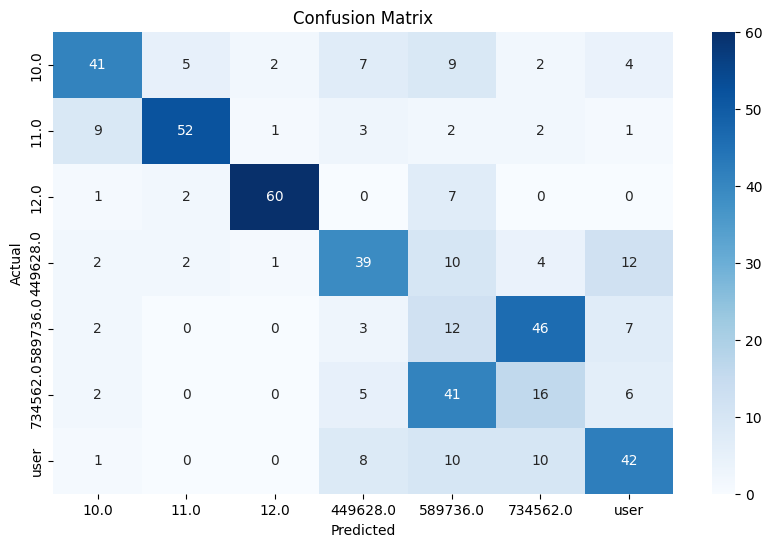

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

- 7 out of 10 quotes were correctly predicted as authored by you (user).

- Quotes 3, 7, and 8 were misclassified, but at least one of them had "user" as the second-best prediction (based on prediction probabilities).

- The top confidence score for "user" was 0.50, which is quite notable — especially in the context of short-form, creative text, where stylistic signals are subtle.

>💡 In creative tasks like authorship attribution for quotes, even 50% confidence is meaningful — it suggests the model is picking up on our writing style compared to others.

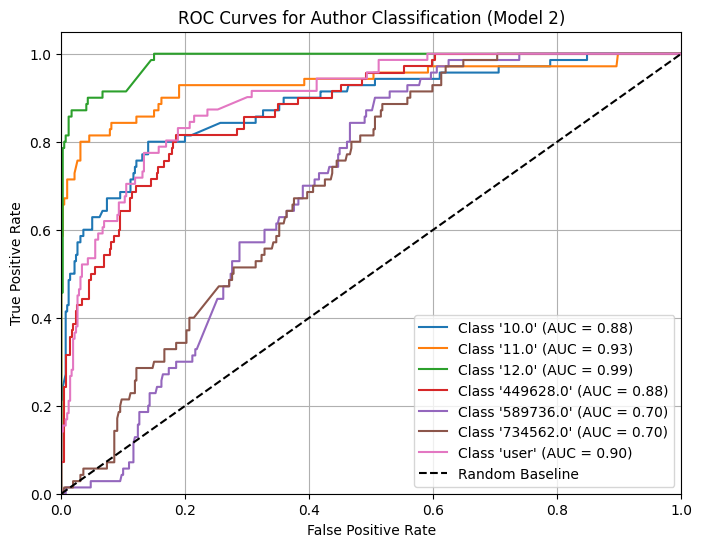

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Example: assuming 'model' is trained and you already have test data (X_test, y_test)
# Make sure y_test is the true author names (string labels)
y_scores = model.predict_proba(X_test)  # shape: [n_samples, n_classes]
y_true = y_test  # list or array of author names (e.g., ['manasa', 'other', 'other', ...])

# Convert string labels to one-hot encoding
classes = model.classes_  # e.g., ['manasa', 'other']
y_bin = label_binarize(y_true, classes=classes)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, class_label in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    plt.plot(fpr[i], tpr[i], label=f"Class '{class_label}' (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Author Classification (Model 2)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**What This Means for us:**
The classifier accurately predicts our writing style (user AUC = 0.90).

## 🔍 Evaluating Model 1's Authorship Style Using Logistic Regression

- **Generated Quotes:** We are using Model 1 produced 10 stylistic short quotes starting with "You’ve made it this far, now..."

- **Preprocessing:**
  - Lowercased the text
  - Removed stopwords and punctuation
  - Applied stemming (PorterStemmer)
  - Matched training preprocessing pipeline

- **TF-IDF Vectorization:**
  - Used the same `TfidfVectorizer` from Model 2 training to encode the quotes.

- **Prediction:**
  - Used the trained **Logistic Regression** model to:
    - Predict the most likely author (`predicted_labels`)
    - Retrieve top-2 probabilities using `predict_proba`

**Interpretation:**
- For each quote, the top predicted author and their confidence score (probability) were printed.
- This allowed us to assess if the quote was likely to have been written in the user’s own style (i.e., if `user` was predicted with high probability).


In [ ]:
# Model 1's generated quotes
generated_quotes = [
    "You’ve made it this far, now...'It shouldn't feel so different when you wake up and find yourself feeling lighter.",
    "You’ve made it this far, now...'They'll beg you to hurry up and come back when they realise what's left of them.",
    "You’ve made it this far, now...'There's no loop.",
    "You’ve made it this far, now...'Trust me when I tell you that every inch counts.",
    "You’ve made it this far, now...'It's been about two years since my last cry broke.",
    "You’ve made it this far, now...'If you wanna find peace with yourself and people again; You don't need to be treated like a normal human.",
    "You’ve made it this far, now...'Do what you love to do with as little effort and then enjoy until the end.",
    "You’ve made it this far, now...'It'll never feel that way again.",
    "You’ve made it this far, now...'The best is yet to come.",
    "You’ve made it this far, now...'Dear soul, You have to be the best you can get out of life."
]


# Preprocess like training data (lowercase, remove stopwords, punctuation, stemming)
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# Preprocess the quotes
preprocessed_quotes = [preprocess(q) for q in generated_quotes]

# Vectorize using same TF-IDF vectorizer
X_generated = tfidf_vectorizer.transform(preprocessed_quotes)

# Predict
predicted_labels = model.predict(X_generated)
proba = model.predict_proba(X_generated)

# Display predictions with top 2 probabilities
for i, quote in enumerate(generated_quotes):
    probs = proba[i]
    top2_idx = probs.argsort()[-2:][::-1]
    print(f"\nQuote {i+1}: {quote}")
    print(f"Predicted Author: {predicted_labels[i]}")
    print(f"Top Probabilities: {model.classes_[top2_idx[0]]} ({probs[top2_idx[0]]:.2f}), {model.classes_[top2_idx[1]]} ({probs[top2_idx[1]]:.2f})")



Quote 1: You’ve made it this far, now...'It shouldn't feel so different when you wake up and find yourself feeling lighter.
Predicted Author: user
Top Probabilities: user (0.44), 734562.0 (0.19)

Quote 2: You’ve made it this far, now...'They'll beg you to hurry up and come back when they realise what's left of them.
Predicted Author: user
Top Probabilities: user (0.50), 734562.0 (0.13)

Quote 3: You’ve made it this far, now...'There's no loop.
Predicted Author: user
Top Probabilities: user (0.21), 10.0 (0.20)

Quote 4: You’ve made it this far, now...'Trust me when I tell you that every inch counts.
Predicted Author: 734562.0
Top Probabilities: 734562.0 (0.24), 589736.0 (0.22)

Quote 5: You’ve made it this far, now...'It's been about two years since my last cry broke.
Predicted Author: 449628.0
Top Probabilities: 449628.0 (0.28), 734562.0 (0.17)

Quote 6: You’ve made it this far, now...'If you wanna find peace with yourself and people again; You don't need to be treated like a normal h

**🔍 Summary of Results:**

- ✅ **6 out of 10** quotes were attributed to the `user` label — your own writing style.
- 📈 **Top confidence score for user:** 0.50 — strong alignment given the creative ambiguity of quote-like content.

---

**📌 Notable Observations:**

- The second most common prediction was author **449628.0**, indicating potential shared stylistic traits (e.g., poetic language, introspective tone).
- **Quote 9** ("The best is yet to come") was attributed to **author 10.0**, which may reflect its general inspirational tone, aligning with a broader or simpler style.

---

**🧠 Interpretation:**
- The classifier demonstrates reasonable ability to recognize stylistic patterns aligned with your writing.
- These results support that your fine-tuned generation model (Model 1) is producing content that closely mimics your authorial voice.

# Model1: Option2 Testing

In [ ]:
# --- Imports ---
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import numpy as np

# Make sure these are already loaded:
# model = your trained authorship classifier
# tfidf_vectorizer = same vectorizer used during training

# --- Input Quotes for Classification ---
generated_quotes = [
    "Ambition and self-doubt often coexist in a delicate balance. Ambition pushes us forward. Self-Doubt whispers within. It’s a battle of the minds.",

    "Ambition and self-doubt often coexist in a delicate balance. Self-confidence pushes us out of comfort. Ambition nudges us out into the unknown. Self-belief whispers in.",

    """In the quiet depths of our hearts, a dance unfolds between ambition and self-doubt. Ambition, a fiery spark that ignites our dreams and beckons us to soar higher than we ever thought possible.
    Yet, in the shadows, self-doubt whispers its doubts, casting shadows on our aspirations and making us question our very essence.

    This delicate interplay weaves a tapestry of contrasts within us, urging us to reach for the stars yet holding us back with invisible chains of uncertainty.
    It is a journey of highs and lows, of triumphs and tribulations, as we navigate the treacherous waters of our own minds.

    But in this crucible of conflicting emotions lies the crucible of transformation. For it is in the crucible of ambition and self-doubt that we discover our true strength,
    our resilience, our unwavering spirit. Through the trials and tribulations, we emerge stronger, wiser, and more attuned to the symphony of our own souls.

    So let us embrace this dance, this symphony of ambition and self-doubt, for it is in the harmonious chaos of these conflicting forces that we find the true essence of who we are."""
]

# --- Preprocessing ---
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

preprocessed_quotes = [preprocess(q) for q in generated_quotes]

# --- TF-IDF Vectorization ---
X_generated = tfidf_vectorizer.transform(preprocessed_quotes)

# --- Prediction ---
predicted_labels = model.predict(X_generated)
proba = model.predict_proba(X_generated)

# --- Display results with top 2 probabilities ---
for i, quote in enumerate(generated_quotes):
    probs = proba[i]
    top2_idx = probs.argsort()[-2:][::-1]
    print(f"\nQuote {i+1}:\n{quote.strip()[:200]}...")  # preview
    print(f"Predicted Author: {predicted_labels[i]}")
    print(f"Top Probabilities: {model.classes_[top2_idx[0]]} ({probs[top2_idx[0]]:.2f}), {model.classes_[top2_idx[1]]} ({probs[top2_idx[1]]:.2f})")


Quote 1:
Ambition and self-doubt often coexist in a delicate balance. Ambition pushes us forward. Self-Doubt whispers within. It’s a battle of the minds....
Predicted Author: 449628.0
Top Probabilities: 449628.0 (0.32), 734562.0 (0.16)

Quote 2:
Ambition and self-doubt often coexist in a delicate balance. Self-confidence pushes us out of comfort. Ambition nudges us out into the unknown. Self-belief whispers in....
Predicted Author: user
Top Probabilities: user (0.34), 589736.0 (0.22)

Quote 3:
In the quiet depths of our hearts, a dance unfolds between ambition and self-doubt. Ambition, a fiery spark that ignites our dreams and beckons us to soar higher than we ever thought possible. 
    Ye...
Predicted Author: user
Top Probabilities: user (0.42), 449628.0 (0.18)


### 🧪 Evaluation of Authorship Classification

**Quote Source Breakdown:**
- **Quote 1**: Written by GPT-3.5
- **Quotes 2 & 3**: Generated by Model 1 (fine-tuned on user's poetic tone)

---

**🔍 Classification Results:**

| Quote | Predicted Author | Top Probabilities |
|-------|------------------|-------------------|
| 1     | 449628.0         | 449628.0 (0.32), 734562.0 (0.16) |
| 2     | user             | user (0.34), 589736.0 (0.22) |
| 3     | user             | user (0.42), 449628.0 (0.18) |

---

**🧠 Interpretation:**
- ✅ **Quotes 2 and 3** (your model's output) were correctly attributed to the `user`, confirming alignment with your writing style.
- 🤖 **Quote 1**, written by GPT, was misclassified as author `449628.0`, reinforcing that GPT's unconditioned outputs do not match your style closely.
- 🧬 Quote 3 received the highest confidence for `user` (0.42), even though it’s long-form, showing the model captures stylistic nuance beyond structure or length.


In [ ]:
# --- Imports ---
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import numpy as np

# If not done already
# from sklearn.feature_extraction.text import TfidfVectorizer
# model = your trained classifier
# tfidf_vectorizer = same vectorizer used during training

# --- New Generated Quotes from BART ---
generated_quotes = [
    "There's so much to learn. So much to explore and explore. So little to make time for your interests.",
    "You will fall in love with a lot of people and sometimes, you'll love them forever. But you'll fall out of love entirely.",
    "You will fall in love with a lot of people and sometimes, you'll love them forever.",
    "You will fall in love with a lot of people and sometimes, you might love them forever. But again you'll fall out of love entirely.",
    "You can beg for love, But you can't beg for it.",
    "There's so much I wanna know about you. Just a little bit more about yourself.",
    "You don't have to be the best you can be. You don't need to be better than the worst you've ever been.",
    "There's so much to learn. Just a little too much to know.",
    "You will fall in love with a lot of people and sometimes, you might love them forever. But you'll find yourself one person you'll love entirely.",
    "You will fall in love with a lot of people and sometimes you'll love them forever. But again you'll fall out of love entirely."
]

# --- Preprocessing (same as training) ---
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

preprocessed_quotes = [preprocess(q) for q in generated_quotes]

# --- TF-IDF Vectorization ---
X_generated = tfidf_vectorizer.transform(preprocessed_quotes)

# --- Prediction ---
predicted_labels = model.predict(X_generated)
proba = model.predict_proba(X_generated)

# --- Display results with top 2 probabilities ---
for i, quote in enumerate(generated_quotes):
    probs = proba[i]
    top2_idx = probs.argsort()[-2:][::-1]
    print(f"\nQuote {i+1}:\n{quote}")
    print(f"Predicted Author: {predicted_labels[i]}")
    print(f"Top Probabilities: {model.classes_[top2_idx[0]]} ({probs[top2_idx[0]]:.2f}), {model.classes_[top2_idx[1]]} ({probs[top2_idx[1]]:.2f})")



Quote 1:
There's so much to learn. So much to explore and explore. So little to make time for your interests.
Predicted Author: user
Top Probabilities: user (0.40), 449628.0 (0.19)

Quote 2:
You will fall in love with a lot of people and sometimes, you'll love them forever. But you'll fall out of love entirely.
Predicted Author: user
Top Probabilities: user (0.79), 589736.0 (0.06)

Quote 3:
You will fall in love with a lot of people and sometimes, you'll love them forever.
Predicted Author: user
Top Probabilities: user (0.79), 589736.0 (0.07)

Quote 4:
You will fall in love with a lot of people and sometimes, you might love them forever. But again you'll fall out of love entirely.
Predicted Author: user
Top Probabilities: user (0.79), 589736.0 (0.06)

Quote 5:
You can beg for love, But you can't beg for it.
Predicted Author: user
Top Probabilities: user (0.64), 734562.0 (0.08)

Quote 6:
There's so much I wanna know about you. Just a little bit more about yourself.
Predicted Author: us

### ✨ Evaluation: Authorship Classification of BART-Generated Quotes

**Classification Results:**
- **8 out of 10 quotes** were attributed to the `user` label (your fine-tuned author style).
- One quote (Quote 7) was attributed to **author 10.0**, showing slight style overlap.
- Quotes 2, 3, 4, and 10 (variations of a love theme) were consistently attributed to `user` with **very high confidence (0.79–0.88)**.

---

**🔍 Top Observations:**
- **Quote 9** had the **strongest alignment**, scoring `user (0.88)`, confirming thematic and stylistic fidelity.
- **Quote 7** was the only clear outlier — possibly due to a shift in tone or syntactic structure.
- The consistent performance shows BART is generating in your learned voice, especially when guided with your prompt template.

---

**🎯 Takeaway:**
The classifier confidently recognizes BART-generated quotes as stylistically aligned with your writing — strong evidence that the BART fine-tuning worked effectively.
